# Principal Component Analysis

## import library

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [211]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

"""
x_mean = np.mean(x)
y_mean = np.mean(y)

x_std = np.std(x)
y_std = np.std(y)

x_normalize = (x - x_mean) / x_std
y_normalize = (y - y_mean) / y_std

cov_matrix = compute_covariance(feature)
S, U = compute_eigen(cov_matrix)

vector_a = S[0] * U[:,0]
vector_b = S[1] * U[:,1]

#projected_feature_a = compute_projection_onto_line(feature, U[:,0])
#projected_feature_b = compute_projection_onto_line(feature, U[:,1])
"""

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))
print(feature.shape)

number of data : 50
number of feature : 2
(50, 2)


## plot the input data

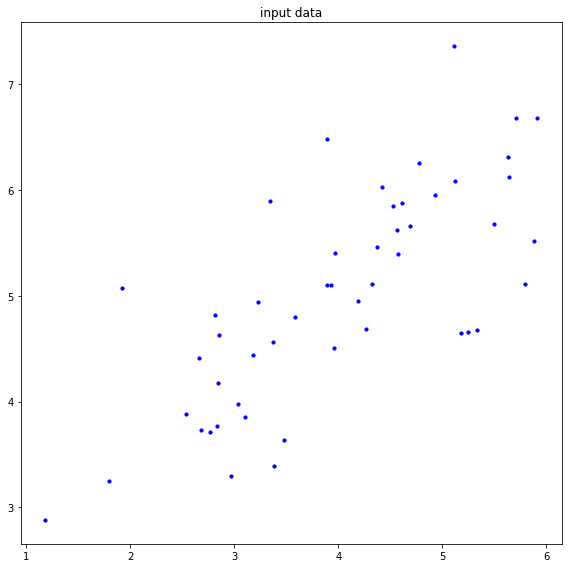

In [212]:
#plt.figure(figsize=(8,8))   
#plt.title('input data')
# ===================================================
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

scatter = ax.scatter (x, y, s = 10, marker = 'o', color = 'blue')
plt.title('input data')
plt.axis('tight')

# ===================================================
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x =  3.9892652
mean of y =  5.0028060000000005
std of x =  1.161260585149156
std of y =  1.0131222834742113
mean of normalized x =  -1.509903313490213e-16
mean of normalized y =  -4.840572387365683e-16
std of normalized x =  0.9999999999999999
std of normalized y =  0.9999999999999999
(50, 2)


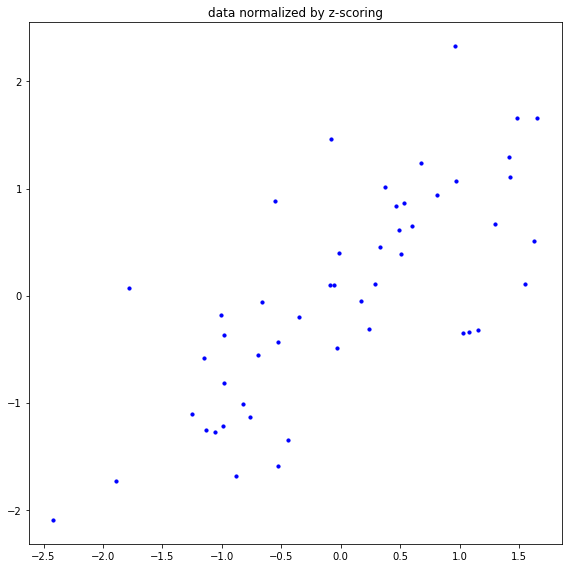

In [213]:
#plt.figure(figsize=(8,8))
#plt.title('data normalized by z-scoring')
# ===================================================
#x_average = np.sum(x) / number_data
#y_average = np.sum(y) / number_data

feature = None

def normalize():
    global feature
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_std = np.std(x)
    y_std = np.std(y)

    x_normalize = (x - x_mean) / x_std
    y_normalize = (y - y_mean) / y_std


    print('mean of x =  {}'.format(x_mean))
    print('mean of y =  {}'.format(y_mean))


    print('std of x =  {}'.format(x_std))
    print('std of y =  {}'.format(y_std))

    std_of_normalized_x = np.std(x_normalize)
    std_of_normalized_y = np.std(y_normalize)

    mean_of_normalized_x = np.mean(x_normalize)
    mean_of_normalized_y = np.mean(y_normalize)

    print('mean of normalized x =  {}'.format(mean_of_normalized_x))
    print('mean of normalized y =  {}'.format(mean_of_normalized_y))


    print('std of normalized x =  {}'.format(std_of_normalized_x))
    print('std of normalized y =  {}'.format(std_of_normalized_y))

    feature = np.stack((x_normalize, y_normalize), axis=1)


    print(feature.shape)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    scatter = ax.scatter (x_normalize, y_normalize, s = 10, marker = 'o', color = 'blue')
    plt.title('data normalized by z-scoring')
    plt.axis('tight')

    # ===================================================
    plt.tight_layout()
    plt.show()

normalize()

## compute covariance matrix

In [214]:
def compute_covariance(feature):
    # ===================================================
    # fill up the function body
    #
    Sigma = np.cov(feature[:,0], feature[:,1], rowvar=False)

    print(Sigma.shape)
    #
    # ===================================================
    return Sigma

## compute principal directions

In [215]:
def compute_eigen(X):
    # ===================================================
    # fill up the function body
    #
    S, U = np.linalg.eig(X)
    #
    # ===================================================
    return S, U

(2, 2)
COV
[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]
S
[1.77094898 0.26986734]
U
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
A
[1.25225004 1.25225004]
B
[-0.19082503  0.19082503]


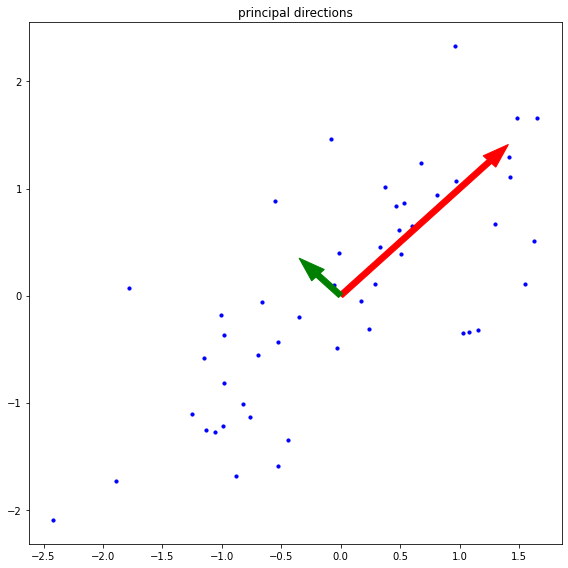

In [216]:
def principal_direction():
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    # ===================================================
    #
    cov_matrix = compute_covariance(feature)
    S, U = compute_eigen(cov_matrix)
    print("COV")
    print(cov_matrix)
    print("S")
    print(S)
    print("U")
    print(U)

    scatter = plt.scatter (x_normalize, y_normalize, s = 10, marker = 'o', color = 'blue')

    vector_a = S[0] * U[:,0]
    vector_b = S[1] * U[:,1]

    print("A")
    print(vector_a)
    print("B")
    print(vector_b)

    arrow_a = plt.arrow(0,0, vector_a[0], vector_a[1], color="red", width=0.05)
    arrow_b = plt.arrow(0,0, vector_b[0], vector_b[1], color="green", width=0.05)
    # ===================================================
    plt.tight_layout()
    plt.show()

principal_direction()

## first principal axis

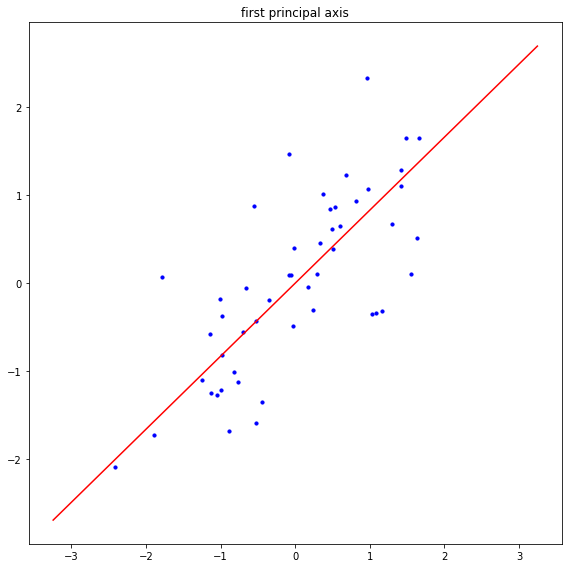

In [217]:
def first_principal():
    fig = plt.figure(figsize=(8,8))
    plt.title('first principal axis')
    #ax = fig.subplots()

    # ===================================================
    # fill up the blank
    #
    #
    scatter = plt.scatter (x_normalize, y_normalize, s = 10, marker = 'o', color = 'blue')
    line_x = (-2 * vector_a[0], 2 * vector_a[0])
    line_y = (-2 * vector_a[1], 2 * vector_a[1])
    plt.plot(line_x, line_y, color="red")
    # ===================================================
    plt.tight_layout()
    plt.show()

first_principal()

## second principal axis

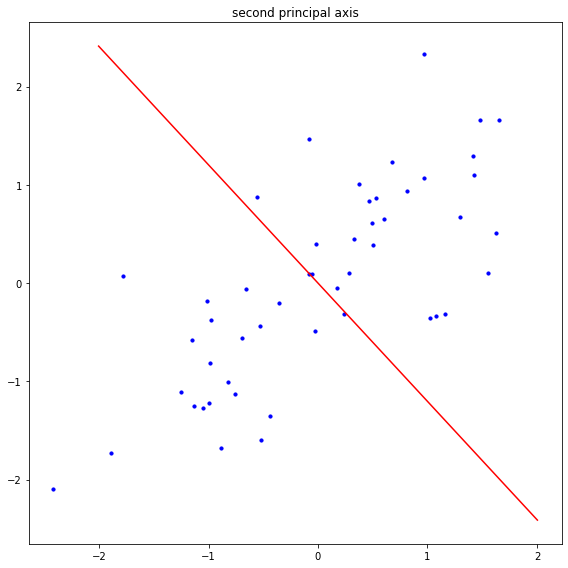

In [218]:
def second_principal():
    fig = plt.figure(figsize=(8,8))
    plt.title('second principal axis')
    # ===================================================
    # fill up the blank
    #ax = fig.subplots()
    scatter = plt.scatter (x_normalize, y_normalize, s = 10, marker = 'o', color = 'blue')
    line_x = (-10 * vector_b[0], 10 * vector_b[0])
    line_y = (-10 * vector_b[1], 10 * vector_b[1])
    plt.plot(line_x, line_y, color="red")
    # ===================================================
    plt.tight_layout()
    plt.show()

second_principal()

## compute the projection of point onto the line

In [219]:
def compute_projection_onto_line(feature, vector):
    # ===================================================
    # fill up the function body
    #
    #
    
    feature_t = np.transpose(feature)
    vector_t = vector.reshape(1,2)
    print("feature")
    print(feature.shape)
    print("feature t")
    print(feature_t.shape)
    print("vector")
    print(vector.shape)
    print("vector_t")
    print(vector_t.shape)

    compression = vector_t.dot(feature_t)
    print("compression")
    print(compression.shape)

    compression_x2 = np.stack((compression[0,:], compression[0,:]), axis=1)

    generation = vector * compression_x2

    print("generation")
    print(generation.shape)

    projection = generation
    print("projection")
    print(projection.shape)
    # ===================================================
    return projection

## projcet to the first principal axis

feature
(50, 2)
feature t
(2, 50)
vector
(2,)
vector_t
(1, 2)
compression
(1, 50)
generation
(50, 2)
projection
(50, 2)


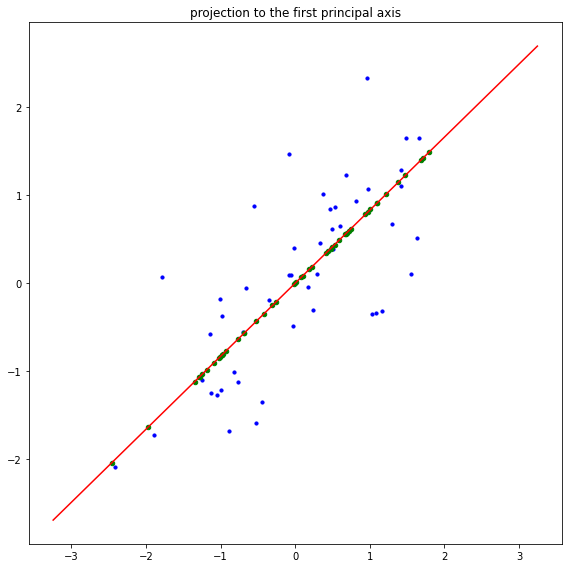

In [220]:
def draw_first_projection():
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principal axis')
    # ===================================================
    # fill up the blank

    projected_feature_a = compute_projection_onto_line(feature, U[:,0])

    line_x = (-2 * vector_a[0], 2 * vector_a[0])
    line_y = (-2 * vector_a[1], 2 * vector_a[1])
    plt.plot(line_x, line_y, color="red")

    scatter1 = plt.scatter (feature[:,0], feature[:,1], s = 10, marker = 'o', color = 'blue')
    scatter2 = plt.scatter (projected_feature_a[:,0], projected_feature_a[:,1], s = 20, marker = 'o', color = 'green')


    #
    # ===================================================
    plt.tight_layout()
    plt.show()

draw_first_projection()

## projcet to the second principal axis

feature
(50, 2)
feature t
(2, 50)
vector
(2,)
vector_t
(1, 2)
compression
(1, 50)
generation
(50, 2)
projection
(50, 2)


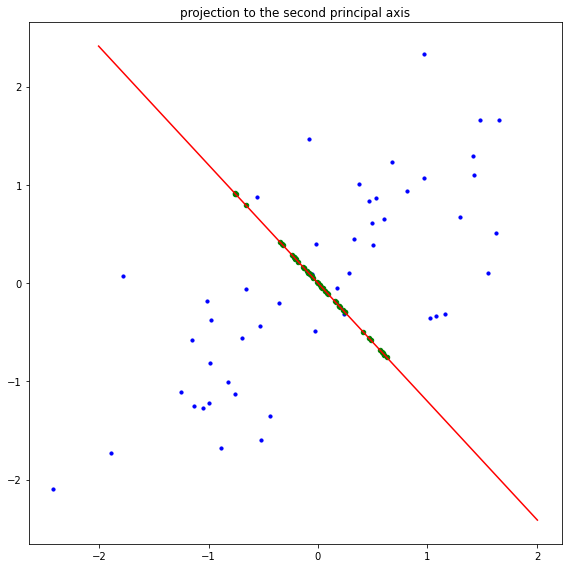

In [221]:
def draw_second_projection():
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principal axis')
    # ===================================================
    # fill up the blank
    #
    projected_feature_b = compute_projection_onto_line(feature, U[:,1])

    line_x = (-10 * vector_b[0], 10 * vector_b[0])
    line_y = (-10 * vector_b[1], 10 * vector_b[1])
    plt.plot(line_x, line_y, color="red")


    scatter1 = plt.scatter (feature[:,0], feature[:,1], s = 10, marker = 'o', color = 'blue')
    scatter2 = plt.scatter (projected_feature_b[:,0], projected_feature_b[:,1], s = 20, marker = 'o', color = 'green')


    # ===================================================
    plt.tight_layout()
    plt.show()

draw_second_projection()

## connect original data to the projection onto the first principal axis

feature
(50, 2)
feature t
(2, 50)
vector
(2,)
vector_t
(1, 2)
compression
(1, 50)
generation
(50, 2)
projection
(50, 2)


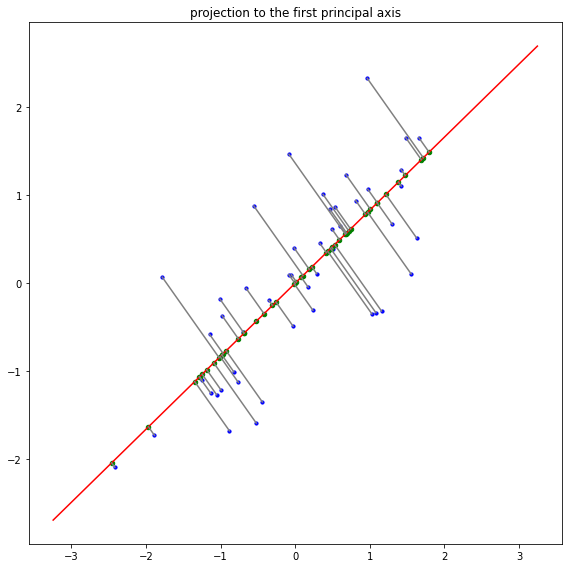

In [222]:
def draw_first_projection_with_lines():
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principal axis')
    # ===================================================
    # fill up the blank
    #
    #
    projected_feature_a = compute_projection_onto_line(feature, U[:,0])
    
    line_x = (-2 * vector_a[0], 2 * vector_a[0])
    line_y = (-2 * vector_a[1], 2 * vector_a[1])
    plt.plot(line_x, line_y, color="red")

    scatter1 = plt.scatter (feature[:,0], feature[:,1], s = 10, marker = 'o', color = 'blue')
    scatter2 = plt.scatter (projected_feature_a[:,0], projected_feature_a[:,1], s = 20, marker = 'o', color = 'green')

    for index in range(number_data):
        point_x1 = feature[index,0]
        point_y1 = feature[index,1]
        point_x2 = projected_feature_a[index,0]
        point_y2 = projected_feature_a[index,1]
        plt.plot([point_x1, point_x2], [point_y1, point_y2], color="gray")
    # ===================================================
    plt.tight_layout()
    plt.show()

draw_first_projection_with_lines()

## connect original data to the projection onto the second principal axis

feature
(50, 2)
feature t
(2, 50)
vector
(2,)
vector_t
(1, 2)
compression
(1, 50)
generation
(50, 2)
projection
(50, 2)


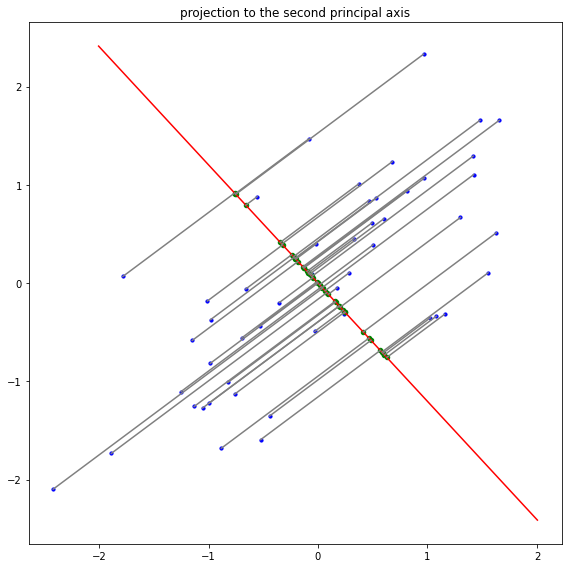

In [223]:
def draw_second_projection_with_lines():
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principal axis')
    # ===================================================
    # fill up the blank
    #
    projected_feature_b = compute_projection_onto_line(feature, U[:,1])
    
    line_x = (-10 * vector_b[0], 10 * vector_b[0])
    line_y = (-10 * vector_b[1], 10 * vector_b[1])
    plt.plot(line_x, line_y, color="red")


    for index in range(number_data):
        point_x1 = feature[index,0]
        point_y1 = feature[index,1]
        point_x2 = projected_feature_b[index,0]
        point_y2 = projected_feature_b[index,1]
        plt.plot([point_x1, point_x2], [point_y1, point_y2], color="gray")
    #

    scatter1 = plt.scatter (feature[:,0], feature[:,1], s = 10, marker = 'o', color = 'blue')
    scatter2 = plt.scatter (projected_feature_b[:,0], projected_feature_b[:,1], s = 20, marker = 'o', color = 'green')
    # ===================================================
    plt.tight_layout()
    plt.show()

draw_second_projection_with_lines()


#### Note that the title in the above figure is wrong. It should be "second principal axis" instead of "first principal axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

mean of x =  3.9892652
mean of y =  5.0028060000000005
std of x =  1.161260585149156
std of y =  1.0131222834742113
mean of normalized x =  -1.509903313490213e-16
mean of normalized y =  -4.840572387365683e-16
std of normalized x =  0.9999999999999999
std of normalized y =  0.9999999999999999
(50, 2)


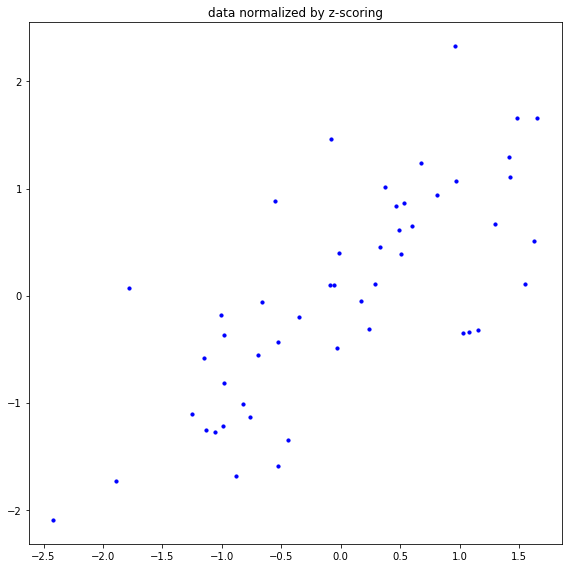

In [224]:
normalize()

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

(2, 2)
COV
[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]
S
[1.77094898 0.26986734]
U
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
A
[1.25225004 1.25225004]
B
[-0.19082503  0.19082503]


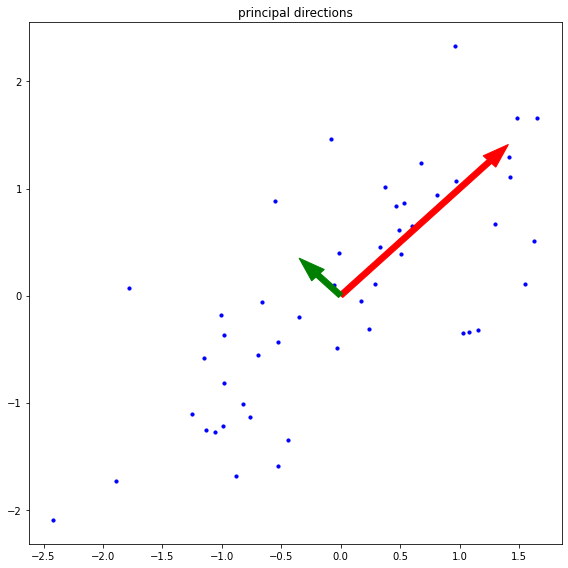

In [225]:
principal_direction()

***

### 3. plot the first principal axis in red on the normalized data in blue

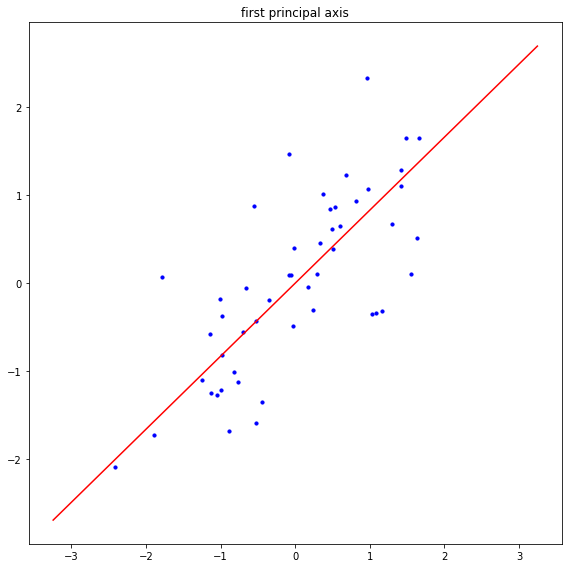

In [226]:
first_principal()

***

### 4. plot the second principal axis in red on the normalized data in blue

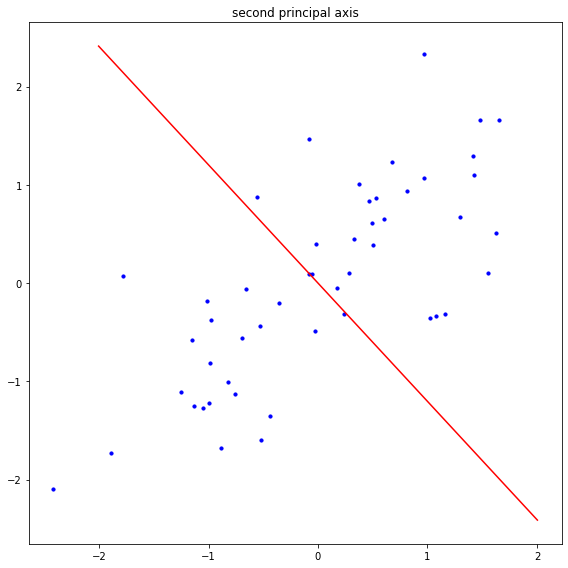

In [227]:
second_principal()

***

### 5. plot the projection of data in green onto the first principal axis in red

feature
(50, 2)
feature t
(2, 50)
vector
(2,)
vector_t
(1, 2)
compression
(1, 50)
generation
(50, 2)
projection
(50, 2)


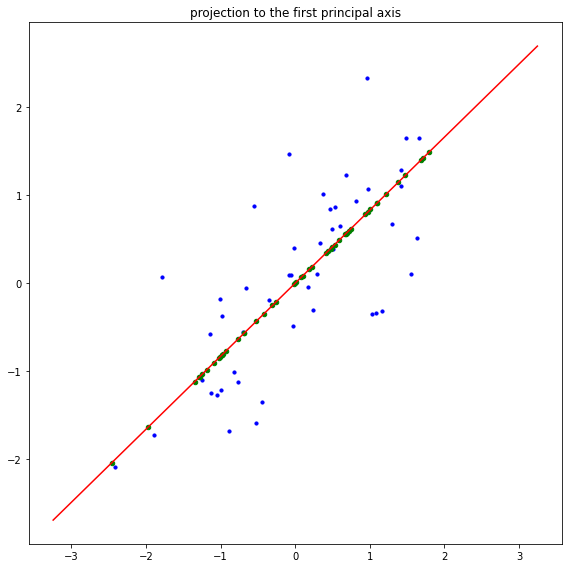

In [228]:
draw_first_projection()

***

### 6. plot the projection of data in green onto the second principal axis in red

feature
(50, 2)
feature t
(2, 50)
vector
(2,)
vector_t
(1, 2)
compression
(1, 50)
generation
(50, 2)
projection
(50, 2)


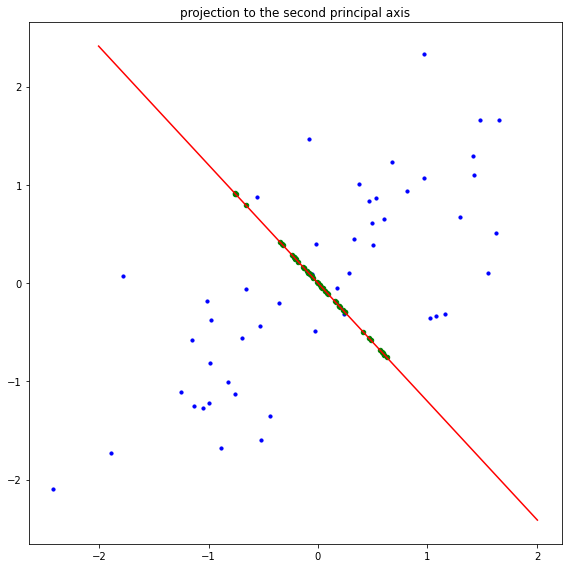

In [229]:
draw_second_projection()

***

### 7. plot the projection line in grey onto the first principal axis

feature
(50, 2)
feature t
(2, 50)
vector
(2,)
vector_t
(1, 2)
compression
(1, 50)
generation
(50, 2)
projection
(50, 2)


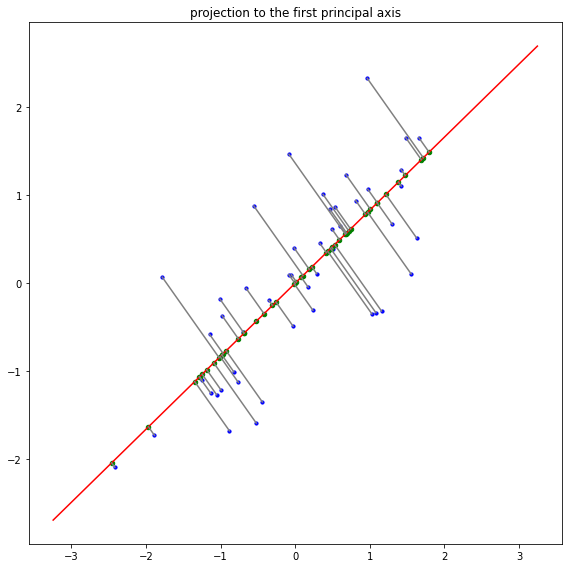

In [230]:
draw_first_projection_with_lines()

***

### 8. plot the projection line in grey onto the second principal axis

feature
(50, 2)
feature t
(2, 50)
vector
(2,)
vector_t
(1, 2)
compression
(1, 50)
generation
(50, 2)
projection
(50, 2)


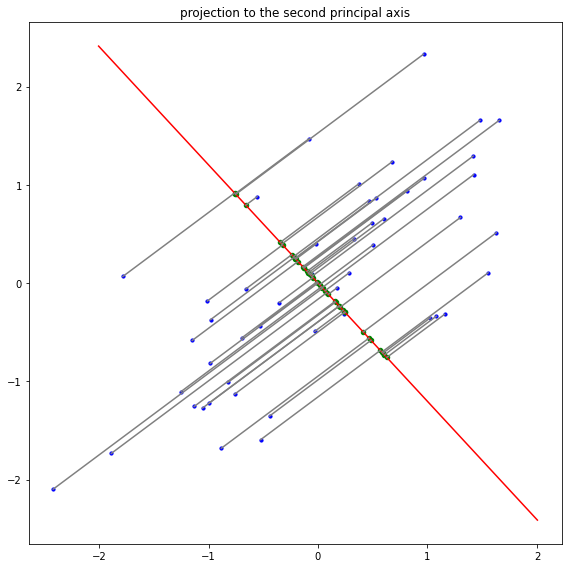

In [231]:
draw_second_projection_with_lines()

#### Note that the title in the above figure is wrong. It should be "second principal axis" instead of "first principal axis"

***